In [9]:
!pip install kneed

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [28]:
import pandas as pd
from kneed import KneeLocator
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
data = pd.read_csv("/content/gdrive/Shareddrives/PMA kelompok 5/Clustering.csv")
data.sample(10)

,news_title
558,aliong mus harap dukung ahmad hidayat mus pilk...
511,paslon yanto aprianto oce kh aminudin daftar k...
86,inova zenix kendara pakai paus fransiskus indo...
1325,poltekbang surabaya buka daftar calon taruna j...
1010,ppp resmi dukung habib had zainal arifin pilka...
694,edi rusyandi unjang asar kpu besok pilkada ban...
198,baik akses jalan kabupaten probolinggo dukung ...
604,forpi kota yogyakarta netralitas asn pemkot yo...
1014,pks golkar merekom abah gun dr umar lawan pasa...
499,pilkada 2024 kpu ri catat 1 467 pasang calon k...


In [31]:
# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['news_title'])

In [32]:
X.shape

(1500, 4023)

In [33]:
data.shape

(1500, 1)

In [34]:
print(X)

  (0, 3788)	0.6117290750343206
  (0, 2252)	0.6117290750343206
  (0, 3798)	0.5015726044306138
  (1, 3941)	0.4899530419646954
  (1, 685)	0.4326001119320165
  (1, 3860)	0.461276576948356
  (1, 2778)	0.45037429093430986
  (1, 1134)	0.39647203867381775
  (2, 1812)	0.30521993365668154
  (2, 3505)	0.29538854414900884
  (2, 3022)	0.17911540792025
  (2, 3748)	0.29538854414900884
  (2, 389)	0.3178947991949888
  (2, 2461)	0.3357590188244813
  (2, 1578)	0.3357590188244813
  (2, 3636)	0.24698523935171657
  (2, 3398)	0.29538854414900884
  (2, 1487)	0.3357590188244813
  (2, 571)	0.3357590188244813
  (3, 3555)	0.29281412479019503
  (3, 3605)	0.35745513154803316
  (3, 1602)	0.267198600600812
  (3, 747)	0.37229916769622745
  (3, 1288)	0.3052577861502987
  (3, 2561)	0.37229916769622745
  :	:
  (1497, 3462)	0.3718119921317794
  (1497, 1689)	0.3718119921317794
  (1498, 33)	0.1561497865893069
  (1498, 1556)	0.22751149286391495
  (1498, 2773)	0.37651475215500824
  (1498, 3651)	0.30457886373769366
  (1498, 74

In [61]:
from scipy.sparse import csr_matrix
X = csr_matrix(X)

In [133]:
# Menggunakan PCA dengan dua komponen
pca = PCA(n_components=2, svd_solver='arpack', random_state=42)
X_pca = pca.fit_transform(X)

In [134]:
X_pca

array([[-0.05784149,  0.00192244],
       [-0.06857347,  0.00333667],
       [-0.06031761, -0.01910996],
       ...,
       [-0.01302591, -0.04603337],
       [-0.01258139, -0.0498005 ],
       [-0.02660965,  0.0884026 ]])

In [135]:
X_pca.shape

(1500, 2)

In [136]:
# Variansi yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = explained_variance_ratio.sum()

print("Variansi dijelaskan oleh komponen pertama:", explained_variance_ratio[0])
print("Variansi dijelaskan oleh komponen kedua:", explained_variance_ratio[1])
print("Total variansi yang dijelaskan oleh dua komponen:", total_variance_explained)

Variansi dijelaskan oleh komponen pertama: 0.009570207239801577
Variansi dijelaskan oleh komponen kedua: 0.006952177176611922
Total variansi yang dijelaskan oleh dua komponen: 0.0165223844164135


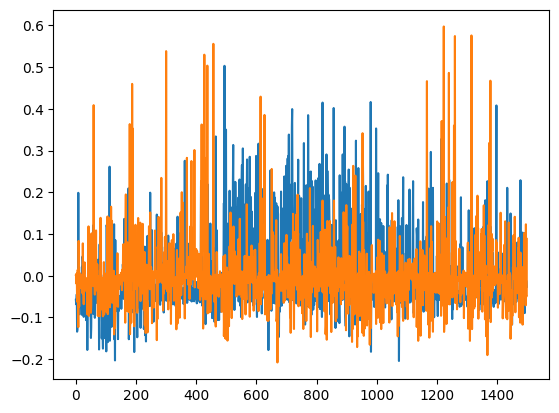

In [137]:
plt.plot(X_pca)
plt.show()

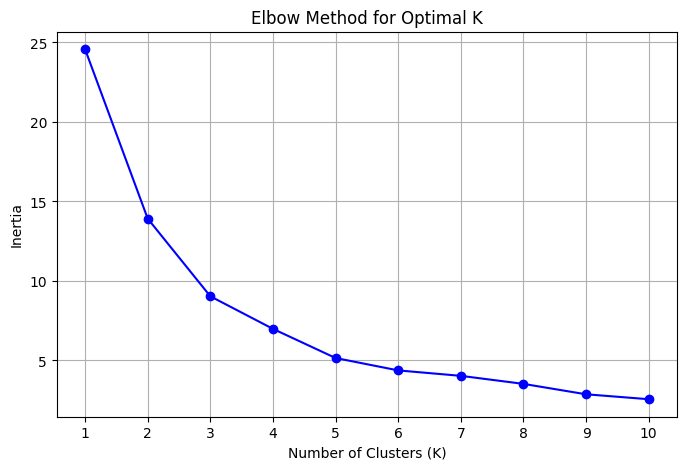

In [138]:
# Metode Elbow
inertia = []
K = range(1, 11)  # Mencoba nilai K dari 1 hingga 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K)
plt.grid()
plt.show()

In [139]:
# Menggunakan KneeLocator untuk mendeteksi titik elbow
kneedle = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

print("Nilai K optimal berdasarkan metode elbow:", optimal_k)

Nilai K optimal berdasarkan metode elbow: 3


In [140]:
kmeans = KMeans(n_clusters= optimal_k, random_state=42)
kmeans.fit(X_pca)
data['cluster'] = kmeans.labels_

In [141]:
#Menghitung Silhouette Score
score = silhouette_score(X_pca, data['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6041065172137291


Cluster 0: Silhouette Score = 0.225
Cluster 1: Silhouette Score = 0.715
Cluster 2: Silhouette Score = 0.343


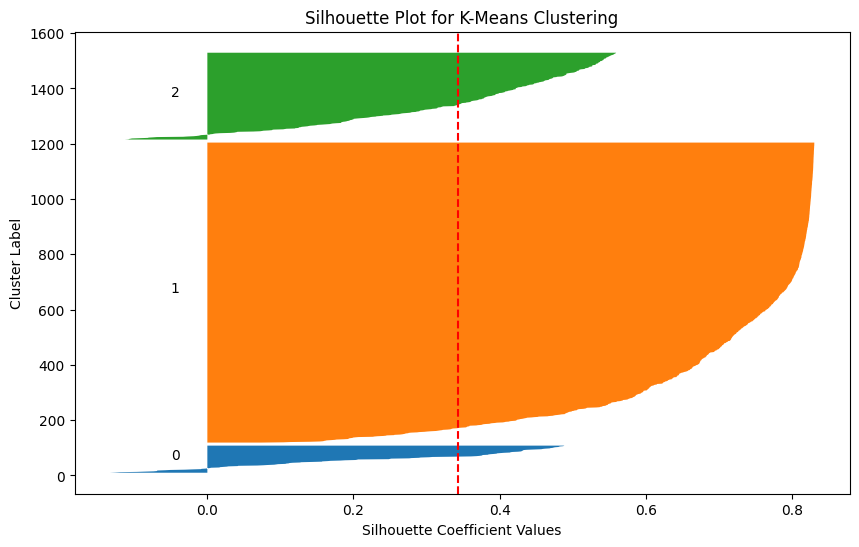

In [145]:
#Menghitung Silhouette Score untuk setiap titik
silhouette_vals = silhouette_samples(X_pca, data['cluster'])

#Menampilkan nilai Silhouette per cluster
silhouette_per_cluster = {}
for i in range(optimal_k):
    # Ambil nilai Silhouette untuk cluster i
    cluster_vals = silhouette_vals[data['cluster'] == i]
    silhouette_per_cluster[i] = cluster_vals.mean()  # Rata-rata nilai Silhouette

# Menampilkan hasil
for cluster, score in silhouette_per_cluster.items():
    print(f'Cluster {cluster}: Silhouette Score = {score:.3f}')

#Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_k):
    # Menentukan lokasi yang tepat untuk cluster
    ith_cluster_silhouette_values = silhouette_vals[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                       0, ith_cluster_silhouette_values)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower = y_upper + 10  # Menambahkan jarak antara cluster

plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.title('Silhouette Plot for K-Means Clustering')
plt.axvline(x=score, color='red', linestyle='--')  # Garis untuk nilai rata-rata Silhouette Score
plt.show()

In [146]:
# Menampilkan judul berdasarkan cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(data[data['cluster'] == i]['news_title'].head(10))  # Tampilkan 10 judul per cluster


Cluster 0:
42     dinas pu bina marga kabupaten malang baik akse...
59     50 anggota dprd lantik bupati serang harap lak...
67        wali kota surabaya perintah penting masyarakat
82     sifat rahasia kpu kota malang taat hasil perik...
105    tentu kpu kabupaten malang ikat bapaslon fatah...
115       dinkes cegah virus monkeypox masuk kota malang
117          wahyu ali dukung penuh urus pks kota malang
120            naik biaya didik picu inflasi kota malang
166                  warga malang kota rindu jalan mulus
179                   ini 100 anggota dprd banten lantik
Name: news_title, dtype: object

Cluster 1:
0                                      ultra mikro umkm
1                        who cepat vaksinasi polio gaza
2     kim tae ri tunjuk bakat nyanyi jeongnyeon the ...
3     tani tembakau jombang curhat hasil panen bagus...
4     momen paus fransiskus istana sambut jokowi kar...
5                 paus fransiskus banjir puji sederhana
6     program bunga desa bupati banyuw

In [147]:
# Simpan hasil clustering ke file CSV
data_sorted = data.sort_values(by=['cluster'])
data_sorted.to_csv('hasil_clustering_TF-IDF_sorted.csv', index=False)

from google.colab import files
files.download('hasil_clustering_TF-IDF_sorted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Jumlah berita per cluster:
cluster
1    1086
2     315
0      99
Name: count, dtype: int64


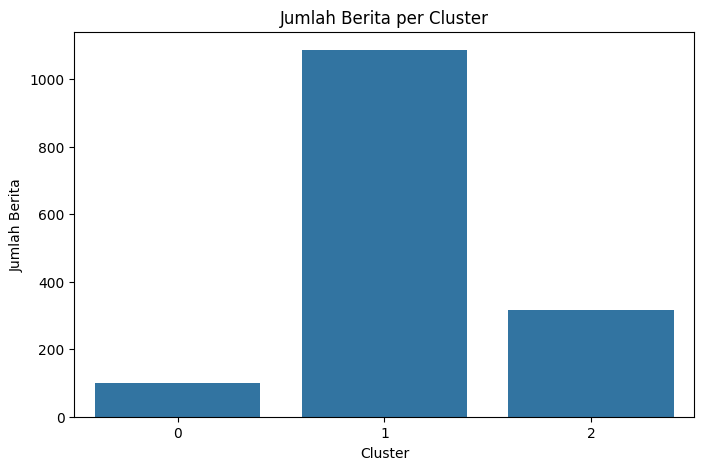

In [148]:
# Menghitung jumlah berita per cluster
cluster_counts = data['cluster'].value_counts()
print("\nJumlah berita per cluster:")
print(cluster_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Jumlah Berita')
plt.title('Jumlah Berita per Cluster')
plt.xticks(cluster_counts.index)
plt.show()

In [150]:
# Mendapatkan posisi centroid untuk setiap cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 0.03241278,  0.21805219],
       [-0.04808748, -0.00816423],
       [ 0.15560044, -0.04038354]])

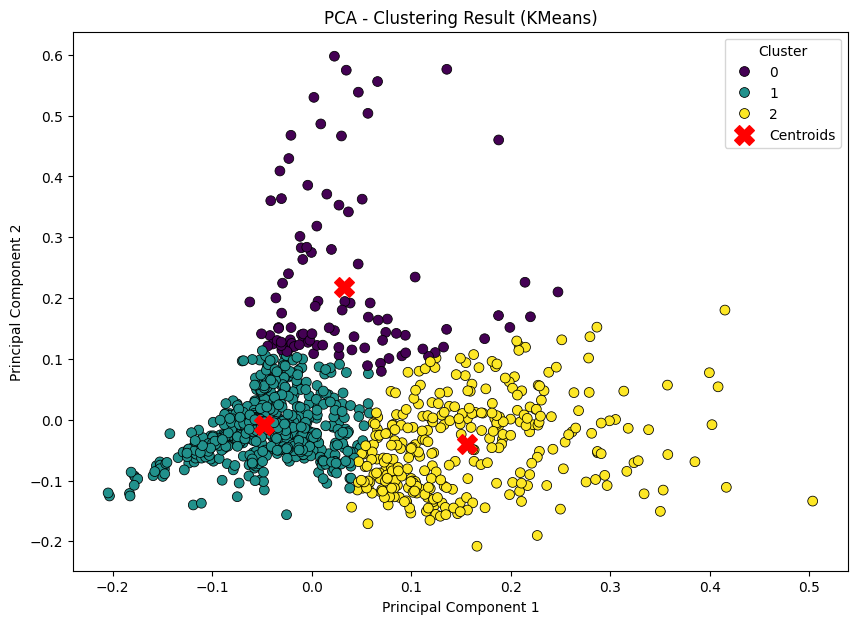

In [151]:
# Visualisasi scatter plot untuk dua komponen pertama dari PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=data['cluster'],
    palette="viridis",
    s=50,
    edgecolor="k"
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)
plt.title('PCA - Clustering Result (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [152]:
# Cek jumlah k cluster lainnya
silhouette_scores = {}

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score

silhouette_df = pd.DataFrame(list(silhouette_scores.items()), columns=['K', 'Silhouette Score'])
print(silhouette_df)

   K  Silhouette Score
0  2          0.574815
1  3          0.604107
2  4          0.557608
3  5          0.529327
4  6          0.521235
5  7          0.508916
6  8          0.452767
7  9          0.489989


In [180]:
n_top_words = 10  # Jumlah kata teratas yang ingin ditampilkan

# Ambil kata-kata (fitur) dari TF-IDF
feature_names = np.array(vectorizer.get_feature_names_out())

# Membuat dictionary untuk menyimpan kata-kata teratas per cluster
top_words_dict = {i: [] for i in range(optimal_k)}

# Step 3: Tampilkan kata-kata teratas untuk setiap kluster
for cluster_num in range(optimal_k):  # optimal_k adalah jumlah kluster yang sudah ditentukan
    # Ambil indeks data yang masuk ke dalam kluster
    cluster_indices = np.where(data['cluster'] == cluster_num)[0]

    # Ambil TF-IDF untuk data dalam kluster ini
    cluster_tfidf = X[cluster_indices]

    # Hitung rata-rata TF-IDF untuk setiap kata dalam kluster ini
    mean_tfidf = np.mean(cluster_tfidf.toarray(), axis=0)

    # Ambil indeks kata teratas
    top_indices = mean_tfidf.argsort()[-n_top_words:][::-1]

    # Ambil kata-kata teratas
    top_words = feature_names[top_indices]

    # Menyimpan kata teratas dalam dictionary
    top_words_dict[cluster_num] = top_words

# Mengubah dictionary menjadi DataFrame untuk visualisasi tabel
top_words_df = pd.DataFrame(top_words_dict)

# Menambahkan rank sebagai baris
top_words_df.index = [f"Rank {i+1}" for i in range(n_top_words)]

# Menampilkan hasil tabel
print(top_words_df)


               0           1            2
Rank 1    daftar   indonesia         kota
Rank 2       kpu        2024       malang
Rank 3   pilkada          ri         dprd
Rank 4    paslon      jokowi      anggota
Rank 5      kota        paus    kabupaten
Rank 6      2024  fransiskus       lantik
Rank 7    pasang  banyuwangi        resmi
Rank 8     resmi    presiden  probolinggo
Rank 9      ribu       jatim        jalan
Rank 10   dukung       sehat           50


In [153]:
!pip install fuzzy-c-means==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [161]:
from fcmeans import FCM # Import FCM untuk C-Means

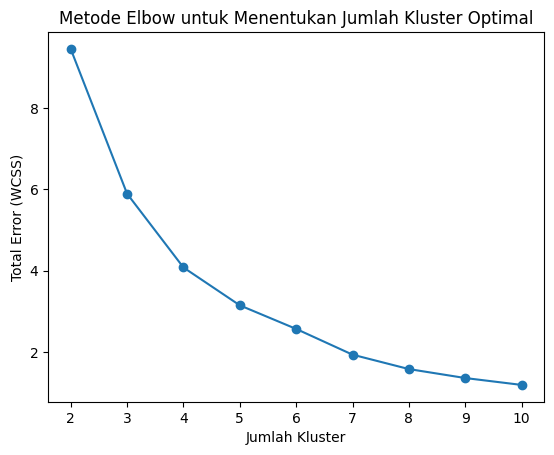

Nilai WCSS untuk setiap jumlah kluster:
K = 2, WCSS = 9.459978079757196
K = 3, WCSS = 5.895753675919883
K = 4, WCSS = 4.079610279196039
K = 5, WCSS = 3.1472765862437173
K = 6, WCSS = 2.5663461822787235
K = 7, WCSS = 1.9326203593315363
K = 8, WCSS = 1.5778002690071942
K = 9, WCSS = 1.3571749407935134
K = 10, WCSS = 1.1876099559073887


In [166]:
# # Fungsi untuk menghitung WCSS (Within-Cluster Sum of Squared Errors) secara manual
# def calculate_wcss(X_pca, u_matrix, centers):
#     n_samples = X_pca.shape[0]
#     n_clusters = u_matrix.shape[1]

#     wcss = 0
#     for i in range(n_samples):
#         for k in range(n_clusters):
#             distance = np.linalg.norm(X_pca[i] - centers[k]) ** 2  # Jarak kuadrat dari data ke centroid
#             wcss += (u_matrix[i, k] ** 2) * distance  # Menambahkan kontribusi kesalahan untuk data ke-k
#     return wcss

# # Fungsi untuk mencari jumlah kluster optimal dengan metode Elbow
# def find_optimal_k_elbow(X_pca, max_k=10):
#     wcss = []  # Menyimpan Total Error (WCSS) untuk setiap jumlah kluster

#     # Mencoba berbagai jumlah kluster (dari 2 hingga max_k)
#     for k in range(2, max_k + 1):
#         fcm = FCM(n_clusters=k)
#         fcm.fit(X_pca)

#         # Menghitung WCSS untuk setiap jumlah kluster
#         wcss_score = calculate_wcss(X_pca, fcm.u, fcm.centers)
#         wcss.append(wcss_score)

#     # Plot hasil Elbow
#     plt.plot(range(2, max_k + 1), wcss, marker='o')
#     plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
#     plt.xlabel('Jumlah Kluster')
#     plt.ylabel('Total Error (WCSS)')
#     plt.show()

#     return wcss

# # Mencari jumlah kluster optimal dengan Elbow
# wcss = find_optimal_k_elbow(X_pca)

# # Jika ingin melihat nilai WCSS untuk setiap jumlah kluster
# print("Nilai WCSS untuk setiap jumlah kluster:")
# for i, w in enumerate(wcss, 2):
#     print(f'K = {i}, WCSS = {w}')

In [173]:
# # Inisialisasi dan fit C-Means
# fcm = FCM(n_clusters=4)
# fcm.fit(X_pca)

# # Mendapatkan label cluster
# data['cluster'] = fcm.u.argmax(axis=1)

In [174]:
# # Menghitung Partition Coefficient (PC)

# u = fcm.u  # Matriks keanggotaan, ukuran (n_samples, n_clusters)
# def partition_coefficient(u_matrix):
#     pc = np.sum(u_matrix ** 2) / u_matrix.shape[0]
#     return pc

# # Menghitung Partition Entropy (PE)
# def partition_entropy(u_matrix):
#     # Menambahkan epsilon untuk menghindari log(0)
#     pe = -np.sum(u_matrix * np.log(u_matrix + 1e-10)) / u_matrix.shape[0]
#     return pe

# # Menampilkan hasil evaluasi
# pc_score = partition_coefficient(u)
# pe_score = partition_entropy(u)
# print(f'Partition Coefficient (PC): {pc_score:.4f}')
# print(f'Partition Entropy (PE): {pe_score:.4f}')

Partition Coefficient (PC): 0.7246
Partition Entropy (PE): 0.5410
